 # Business Understanding



The goal of this project is to predict churn customers so telecom-companies can immediately take action to retain existing customers by improving customer services, product quality, and be able to know in advance which customers have the possibility of leaving the organization.

 # Data Understanding


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#df = pd.read_csv('/content/ColabNotebooks/MyDrive/Colab Notebooks/Telco_customer_churn.csv')
df = pd.read_csv('Telco_customer_churn.csv')

In [2]:
df.head(5)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
df.shape

(7043, 33)

In [10]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [11]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [12]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [14]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [15]:
df=df.replace(" ",np.nan)

In [16]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [17]:
#comment

In [18]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

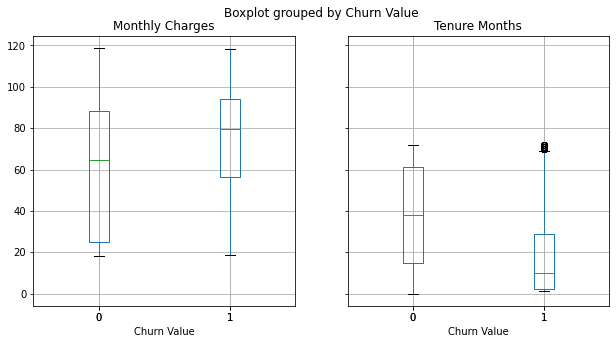

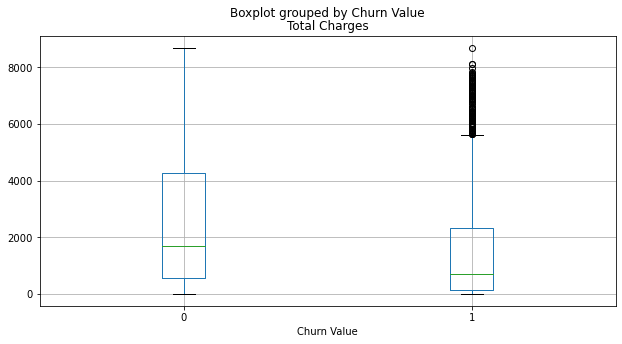

In [19]:
boxplot=df.boxplot(column=['Monthly Charges','Tenure Months'], by='Churn Value',figsize=(10,5))
boxplot=df.boxplot(column=['Total Charges'], by='Churn Value',figsize=(10,5))

In [20]:
numerical_features = ['Tenure Months','Monthly Charges','Total Charges']
df_num = df[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3- Q1
IQR
((df_num <(Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR ))).any()

Tenure Months      False
Monthly Charges    False
Total Charges      False
dtype: bool

In [21]:
df["Churn Value"].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

<AxesSubplot:xlabel='Churn Value', ylabel='count'>

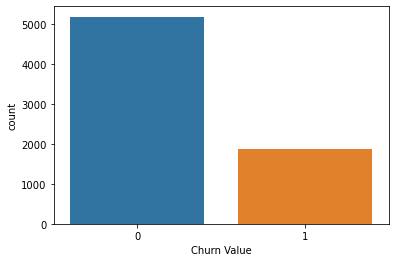

In [22]:
sns.countplot(x=df["Churn Value"])

In [23]:
df["City"].value_counts()

Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Volcano            4
Blocksburg         4
La Honda           4
Hat Creek          4
Chester            4
Name: City, Length: 1129, dtype: int64

In [24]:
df["Country"].value_counts()

United States    7043
Name: Country, dtype: int64

In [25]:
df["State"].value_counts()

California    7043
Name: State, dtype: int64

In [26]:
plots={1 : [111], 2 :[121,122], 3 : [131,132,133], 4 :[221,222,223,224], 5 :[231,232,233,234,235], 6 :[231,232,233,234,235,236]}
def countplot(x,y,df):
  

    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
  
    plt.figure(figsize=(7*columns,7*rows))

    for i , j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df , palette='Blues' , alpha=1 , linewidth=0.4 , edgecolor='black')
        ax.set_title(j)
    return plt.show()

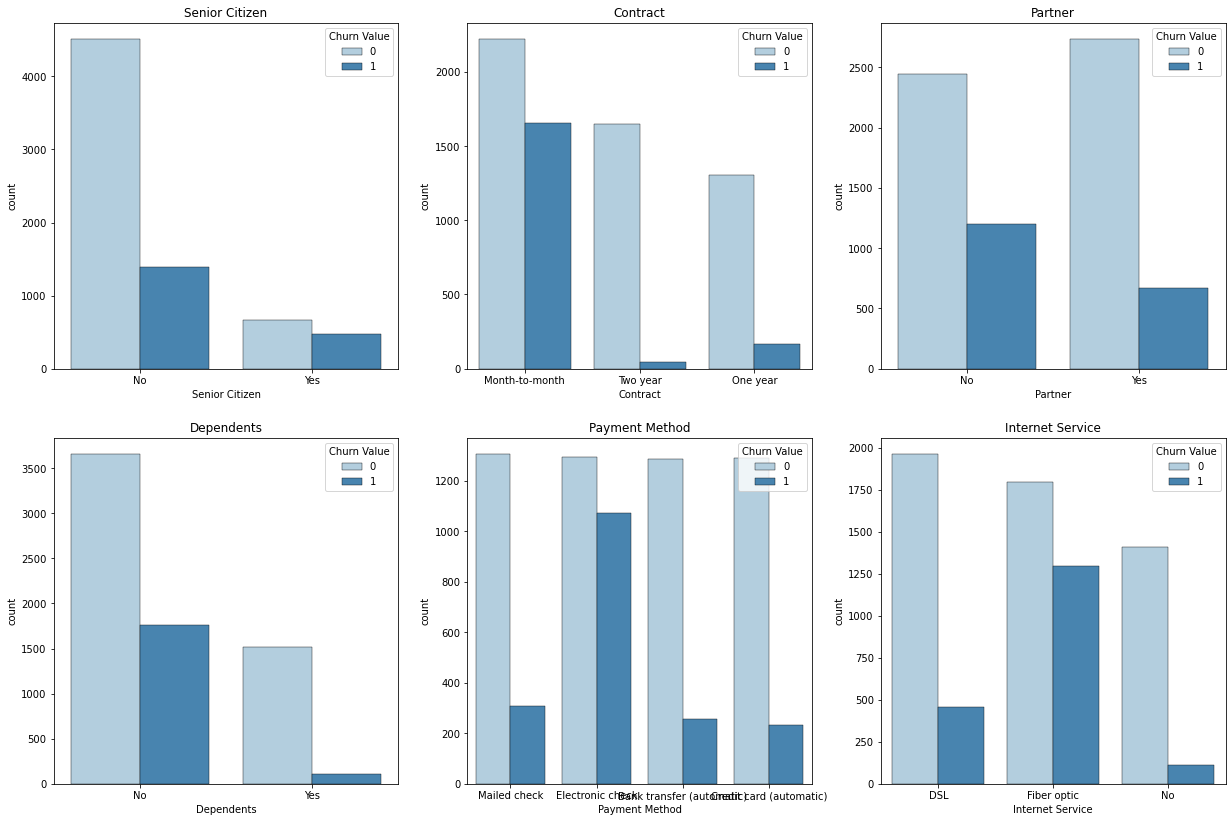

In [27]:
countplot("Churn Value", ['Senior Citizen', 'Contract', 'Partner', 'Dependents', 'Payment Method', 'Internet Service'], df)

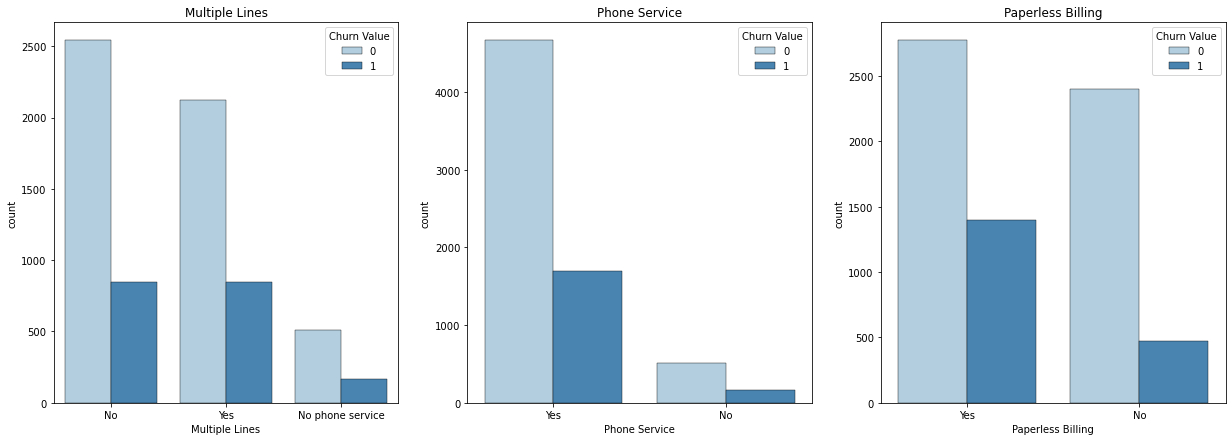

In [28]:
countplot("Churn Value", ['Multiple Lines', 'Phone Service', 'Paperless Billing'], df)

# Data Preprossesing


In [29]:
mean_value=df['Total Charges'].mean()
mean_value

2283.3004408418697

In [30]:
#imputation
df['Total Charges'].fillna(value=df['Total Charges'].mean(), inplace=True)

In [31]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [32]:
df.drop(columns=['CustomerID','Churn Score','Churn Label','CLTV','Churn Reason'], axis=1 , inplace=True)

In [33]:
df.shape
df.columns

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

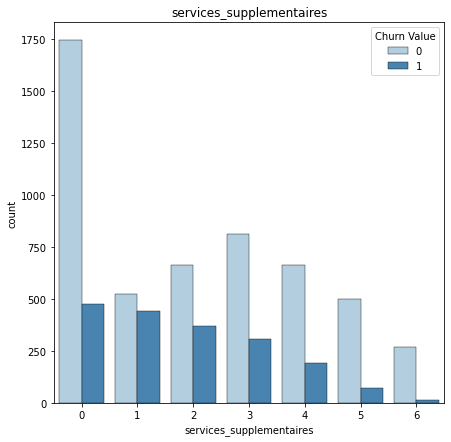

In [34]:
df['services_supplementaires'] =(df[['Online Security','Device Protection','Streaming TV','Tech Support','Streaming Movies','Online Backup']] == 'Yes').sum(axis=1)
countplot('Churn Value', ['services_supplementaires'], df)

* /Le countplot montre un taux de désabonnement très élevé pour les clients qui ont 1 service supplémentaire.
* /Les clients disposant d'un très grand nombre de services supplémentaires ont un faible taux de désabonnement.

In [35]:
#normalization minmax

In [36]:
from sklearn.preprocessing import OneHotEncoder
features_ohe=['Payment Method']
df=pd.get_dummies(df,columns=features_ohe)

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
columns_to_convert = ['Senior Citizen', 'Partner', 'Dependents', 
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing',
       'Phone Service','City','Longitude','Zip Code','Latitude','Gender','Count',
       'Country','State','Total Charges','Lat Long']
for i in columns_to_convert:

  df[i] = labelencoder_X.fit_transform(df[i])

<AxesSubplot:>

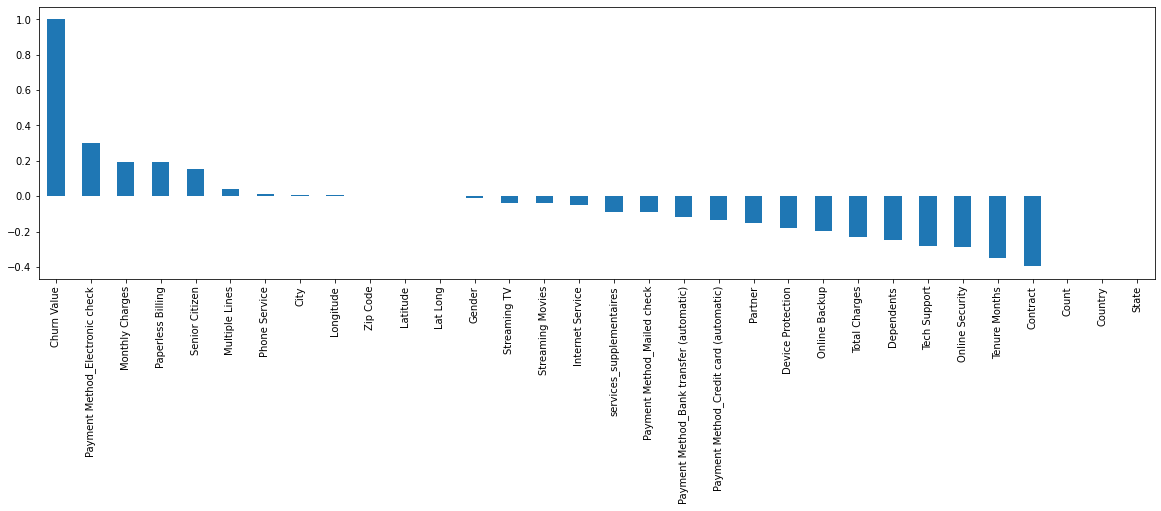

In [38]:
plt.figure(figsize=(16,10))
df.corr()['Churn Value'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

In [39]:
df.drop(columns=['Phone Service','City','Longitude','Zip Code','Latitude','Gender','Count','Country','State','Total Charges','Lat Long'], axis=1 , inplace=True)

In [40]:
df.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Monthly Charges',
       'Churn Value', 'services_supplementaires',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [41]:
df.head(5)

,Senior Citizen,Partner,Dependents,Tenure Months,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,...,Streaming Movies,Contract,Paperless Billing,Monthly Charges,Churn Value,services_supplementaires,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,0,2,0,0,2,2,0,0,...,0,0,1,53.85,1,2,0,0,0,1
1,0,0,1,2,0,1,0,0,0,0,...,0,0,1,70.70,1,0,0,0,1,0
2,0,0,1,8,2,1,0,0,2,0,...,2,0,1,99.65,1,3,0,0,1,0
3,0,1,1,28,2,1,0,0,2,2,...,2,0,1,104.80,1,4,0,0,1,0
4,0,0,1,49,2,1,0,2,2,0,...,2,0,1,103.70,1,4,1,0,0,0


In [42]:
#Features Selection 
from sklearn.feature_selection import VarianceThreshold
selecteur = VarianceThreshold(threshold=0.02)
selecteur.fit_transform(df)
selecteur.get_support()
print('feature selection',selecteur.get_support())
print('variables selectionées',df.columns[selecteur.get_support()])
print('variables supprimées',df.columns[~selecteur.get_support()])

feature selection [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
variables selectionées Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Monthly Charges',
       'Churn Value', 'services_supplementaires',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')
variables supprimées Index([], dtype='object')


# Modelisation


## <font color='blue'> Naive Bayes </font>

In [43]:
#applying sklearn's splitter function tain_test_split
from sklearn.model_selection import train_test_split
X1 = df.drop('Churn Value',axis=1)
X = X1.values
y = df['Churn Value'].values
print(X)
print(y)
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 1. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 1 ... 0 0 0]


In [44]:
print ('X_test.shape:',X_test.shape)
print("X_train.shape:",X_train.shape)
print("y_test.shape:",y_test.shape)

X_test.shape: (2113, 20)
X_train.shape: (4930, 20)
y_test.shape: (2113,)


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

In [46]:
def confusion_matrix_plot (X_train, y_train, X_test, y_test, classifier, y_pred , classifier_name):
 # fig, ax = plt.subplots(figsize=(6,5))
  #plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn","Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
  #ax.set_title(f'{classifier_name} - Confusion Matrix')
  #plt.show()

  fig, ax= plt.subplots(figsize=(6,5))
  plot_confusion_matrix(classifier, X_test, y_test, display_labels=["NO churn", "churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
  ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
  plt.show()

  print(f'Accuracy Score Test y_test, y_pred: {accuracy_score(y_test,y_pred)}')
  print(f'Accuracy Score Train x_train, y_train: {classifier.score(X_train, y_train)} (comme comparison)')
  return print("")

In [47]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
 
  y_pred_prob = y_pred_probabilities[:,1]
  fpr, tpr , thresholds = roc_curve(y_test,y_pred_prob)

  plt.plot([0, 1],[0, 1], 'k--')
  plt.plot(fpr,tpr,label=f'{classifier_name}')
  plt.xlabel('Flase Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'{classifier_name} - ROC Curve')
  plt.show()

  return print(f'AUC Score (ROC): {roc_auc_score(y_test,y_pred_prob)}\n')

In [48]:
def precision_recall_curve_and_scores(X_test, y_test,y_pred, y_pred_probabilities, classifier_name):

  y_pred_prob = y_pred_probabilities[:,1]
  precision ,recall , thresholds = precision_recall_curve(y_test,y_pred_prob)

  plt.plot(recall, precision, label=f'{classifier_name}')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(f'{classifier_name} - Precision-Recall Curve')
  plt.show()

  f1_score_result, auc_score_result = f1_score(y_test,y_pred), auc(recall, precision)

  return print(f'F1 Score : {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

In [49]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernomulliNB(),
      'multinomial': MultinoialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.7640973630831643,
 'bernoulli': 0.7539553752535497,
 'multinomial': 0.7371196754563895}

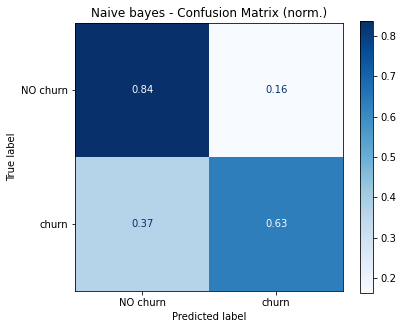

Accuracy Score Test y_test, y_pred: 0.7799337434926644
Accuracy Score Train x_train, y_train: 0.7894523326572008 (comme comparison)



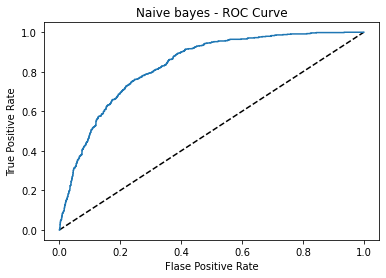

AUC Score (ROC): 0.8325571540091448



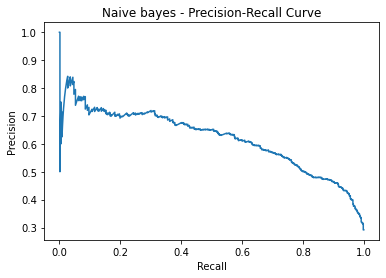

F1 Score : 0.6153846153846153 
AUC Score (PR): 0.6187280900151856



In [ ]:

Naivb = MultinomialNB()
Naivb.fit(X_train, y_train)
y_pred_Naivb = Naivb.predict(X_test)
y_pred_Naivb_prob = Naivb.predict_proba(X_test)

confusion_matrix_plot(X_train, y_train, X_test, y_test, Naivb, y_pred_Naivb,'Naive bayes')
roc_curve_auc_score(X_test, y_test, y_pred_Naivb_prob, 'Naive bayes')
precision_recall_curve_and_scores(X_test, y_test,y_pred_Naivb, y_pred_Naivb_prob, 'Naive bayes')


In [ ]:
Naivb.class_log_prior_

array([-0.30088583, -1.34769797])

In [ ]:
from sklearn.model_selection import GridSearchCV


params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

Naivb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
Naivb_grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%Naivb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%Naivb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%Naivb_grid.best_score_)
print('Best Parameters : ',Naivb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Train Accuracy : 0.789
Test Accuracy : 0.780
Best Accuracy Through Grid Search : 0.788
Best Parameters :  {'alpha': 1.0}


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:    2.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed:    2.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.3s finished


## <font color='blue'> Logistic_Regression () : </font>


In [ ]:
from sklearn.linear_model import LogisticRegression

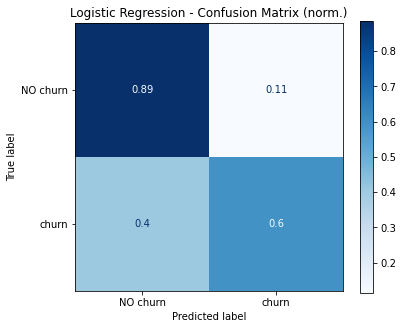

Accuracy Score Test y_test, y_pred: 0.8045433033601515
Accuracy Score Train x_train, y_train: 0.8101419878296146 (comme comparison)



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)   #trainer l'algo par les donneees d'entrainenemt (question a chiheb nekhdem n x-train wela x-train_sc)
#on va calculer le score de notre algo 
#mais on doit evaluer le modele par la matrice de confusion
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg,'Logistic Regression')

d'aprés la matrice de confusion on a :<br/>
{TP = on a prédit que le client ne va pas désabonner et c'est juste : 0.72 <br/>
                                      TN = on a prédit que le client va désabonner et c'est juste : 0.79<br/>
                                      FP = on a prédit qu'il va désabonner mais il va rester : 0.28<br/>
                                      FN = on a prédit qu'il va rester mais il va désabonner : 0.21}<br/>
on remarque que les dangereuses valeurs sont celui de FN et FP et FN et plus dangereuse donc notre but et de concentrer sur ces derniers.
d'ou on doit améliorer surtout la métrique de rappel (doit etre trés proche de 1). 

In [ ]:
print(classification_report(y_test, y_pred_logreg, digits=6))

              precision    recall  f1-score   support

           0   0.850126  0.885246  0.867331      1525
           1   0.666667  0.595238  0.628931       588

    accuracy                       0.804543      2113
   macro avg   0.758396  0.740242  0.748131      2113
weighted avg   0.799073  0.804543  0.800989      2113



In [ ]:
#pour le classe 0 la precision egale a 0.902676 ......
#support c'est le nombre de valleur pour le modele  (pour 1035 de classe 0 le modele a rate 0.28%(d'apres la matrice de confusion) hors que 0.72% sont juste )
#de meme pour classe 1
#f1-score=0.804543=score test


On remarque que le train score et le test score sont très proches l'un de l'autre .mais quand meme on va essayer de régler les parametre du logreg pour améliorer les résultats 


In [ ]:

print(y_pred_logreg_prob.shape) #c'est le nombre de donnees test 
y_pred_logreg_prob #ce sont les 2 probabilite a calculer (p(x=0 classe 0) et p(x=1 classe 1) ) 
#0.9016>0.09833 ==> donc le premier appartient au classe 0

(2113, 2)


array([[0.44808667, 0.55191333],
       [0.65049598, 0.34950402],
       [0.72402136, 0.27597864],
       ...,
       [0.99718963, 0.00281037],
       [0.9845791 , 0.0154209 ],
       [0.97577749, 0.02422251]])

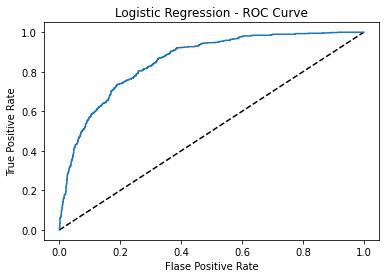

AUC Score (ROC): 0.8552302888368463



In [ ]:
#pour jujer notre algo on trace le courbe roc et la premiere bisectrice

roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Logistic Regression')

On remarque que notre courbe est au desssus de la 1er bissectrice donc on peut conserver notre algorithme et on va essayer de l'améliorer.

```
# Ce texte est au format code
```



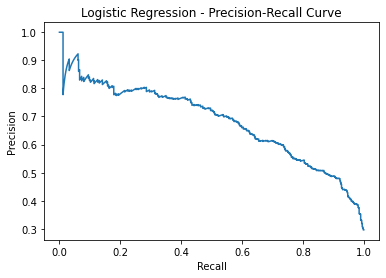

F1 Score : 0.6289308176100629 
AUC Score (PR): 0.682608973344154



In [ ]:
#presenter et calculer de l'aire de surface qui est au dessous de courbe ROC (c'est le AUC) et on garde l'algo quia le plus grand valeur
precision_recall_curve_and_scores(X_test, y_test,y_pred_logreg, y_pred_logreg_prob, 'Logistic Regression')

## <font color='blue'> Logistic_Regression with hyperparameter (GridSearchCV) : </font>


In [ ]:
from sklearn.model_selection import GridSearchCV
log = LogisticRegression(random_state=0)

In [ ]:
param =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [30,100, 150, 300]}

In [ ]:
grid = GridSearchCV(log, param_grid=param, cv =5, n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2....
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
                         'max_iter': [30, 100, 150, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg',

In [ ]:
search.best_estimator_

LogisticRegression(C=3.2323232323232323, max_iter=1000, penalty='l1',
                   random_state=0, solver='liblinear')

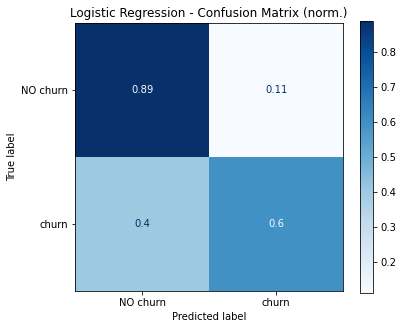

Accuracy Score Test y_test, y_pred: 0.8069096071935636
Accuracy Score Train x_train, y_train: 0.8133874239350912 (comme comparison)



In [ ]:
logreg_1 = LogisticRegression(C=3.2323232323232323, max_iter=1000, penalty='l1',
                   random_state=0, solver='liblinear')
logreg_1.fit(X_train,y_train) #trainer l'algo par les donneees d'entrainenemt (question a chiheb nekhdem n x-train wela x-train_sc)
y_pred_logreg_1 = logreg_1.predict(X_test)
y_pred_logreg_prob_1 = logreg_1.predict_proba(X_test)

#on va calculer le score de notre algo 
#mais on doit evaluer le modele par la matrice de confusion

confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg_1, y_pred_logreg_1,'Logistic Regression')

In [ ]:
print(classification_report(y_test, y_pred_logreg_1, digits=6))

              precision    recall  f1-score   support

           0   0.851479  0.887213  0.868979      1525
           1   0.671756  0.598639  0.633094       588

    accuracy                       0.806910      2113
   macro avg   0.761617  0.742926  0.751036      2113
weighted avg   0.801466  0.806910  0.803337      2113



In [ ]:
print(y_pred_logreg_prob_1.shape) #c'est le nombre de donnees test 
y_pred_logreg_prob_1 #ce sont les 2 probabilite a calculer (p(x=0 classe 0) et p(x=1 classe 1) ) 
#0.9016>0.09833 ==> donc le premier appartient au classe 0

(2113, 2)


array([[0.43886344, 0.56113656],
       [0.67203555, 0.32796445],
       [0.7311691 , 0.2688309 ],
       ...,
       [0.9973823 , 0.0026177 ],
       [0.98630163, 0.01369837],
       [0.97732931, 0.02267069]])

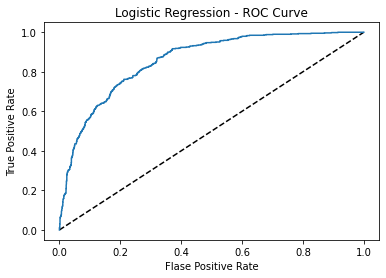

AUC Score (ROC): 0.8571908107505298



In [ ]:
#pour jujer notre algo on trace le courbe roc et la premiere bisectrice

roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob_1, 'Logistic Regression')

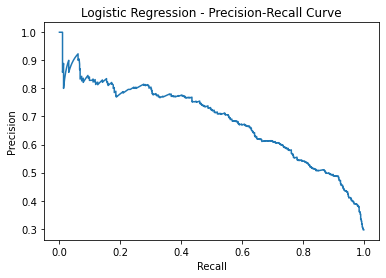

F1 Score : 0.6330935251798561 
AUC Score (PR): 0.6865085010850122



In [ ]:
#presenter et calculer de l'aire de surface qui est au dessous de courbe ROC (c'est le AUC) et on garde l'algo quia le plus grand valeur
precision_recall_curve_and_scores(X_test, y_test,y_pred_logreg_1, y_pred_logreg_prob_1, 'Logistic Regression')




## <font color='blue'> Logistic_Regression with hyperparameter (RandomizedSearchCV) : </font>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
log = LogisticRegression(random_state=0)

In [ ]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100,1000, 2000, 3000]}
search = RandomizedSearchCV(log,param_distributions=param_grid,
                           cv= 5,n_jobs=-1)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.2222222...
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
                                        'max_iter': [100, 1000, 2000, 3000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
  

In [ ]:
search.best_estimator_

LogisticRegression(C=3.2323232323232323, max_iter=1000, penalty='l1',
                   random_state=0, solver='liblinear')

In [ ]:
search.best_params_

{'solver': 'liblinear',
 'penalty': 'l1',
 'max_iter': 1000,
 'C': 3.2323232323232323}

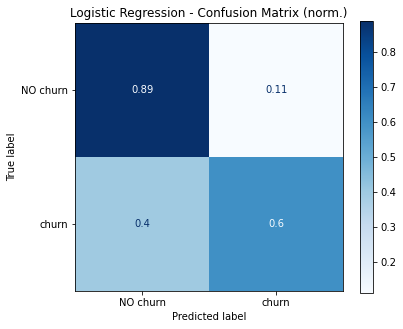

Accuracy Score Test y_test, y_pred: 0.807382867960246
Accuracy Score Train x_train, y_train: 0.8139959432048681 (comme comparison)



In [ ]:
logreg_2 = LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
logreg_2.fit(X_train,y_train)  


#trainer l'algo par les donneees d'entrainenemt (question a chiheb nekhdem n x-train wela x-train_sc)

#on va calculer le score de notre algo 
#mais on doit evaluer le modele par la matrice de confusion
y_pred_logreg_2 = logreg_2.predict(X_test)
y_pred_logreg_prob_2 = logreg_2.predict_proba(X_test)

confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg_2, y_pred_logreg_2,
                      'Logistic Regression')

In [ ]:
print(classification_report(y_test, y_pred_logreg_2, digits=6))

              precision    recall  f1-score   support

           0   0.852015  0.887213  0.869258      1525
           1   0.672381  0.600340  0.634322       588

    accuracy                       0.807383      2113
   macro avg   0.762198  0.743777  0.751790      2113
weighted avg   0.802027  0.807383  0.803881      2113



In [ ]:
print(y_pred_logreg_prob_2.shape) #c'est le nombre de donnees test 
y_pred_logreg_prob_2 #ce sont les 2 probabilite a calculer (p(x=0 classe 0) et p(x=1 classe 1) ) 
#0.9016>0.09833 ==> donc le premier appartient au classe 0

(2113, 2)


array([[0.43980949, 0.56019051],
       [0.67360075, 0.32639925],
       [0.73068474, 0.26931526],
       ...,
       [0.99739771, 0.00260229],
       [0.98634131, 0.01365869],
       [0.97748335, 0.02251665]])

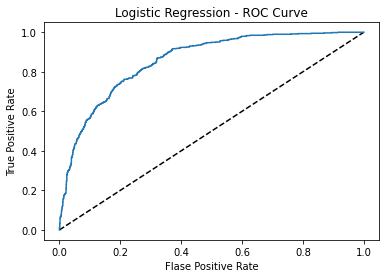

AUC Score (ROC): 0.8572242667558827



In [ ]:
#pour jujer notre algo on trace le courbe roc et la premiere bisectrice

roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob_2,
                    'Logistic Regression')

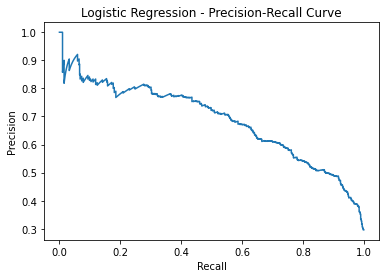

F1 Score : 0.6343216531895777 
AUC Score (PR): 0.6866966374327476



In [ ]:
#presenter et calculer de l'aire de surface qui est au dessous de courbe ROC (c'est le AUC) et on garde l'algo quia le plus grand valeur
precision_recall_curve_and_scores(X_test, y_test,y_pred_logreg_2, y_pred_logreg_prob_2, 'Logistic Regression')


On remarque que malgrés qu'on a essayé d'améliorer le modéle on n'a pa pu réussir à le faire donc on peut conclure que cet algorithme est n'est pas assez puissant pour ce problème

## <font color='blue'>Random forest: </font>

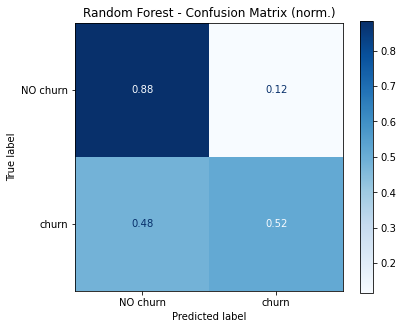

Accuracy Score Test y_test, y_pred: 0.7818267865593942
Accuracy Score Train x_train, y_train: 0.9969574036511156 (comme comparison)



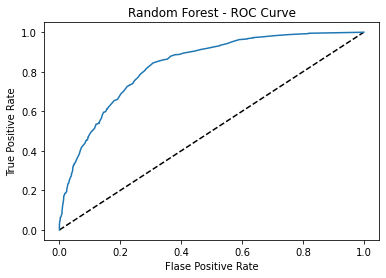

AUC Score (ROC): 0.833273112523698



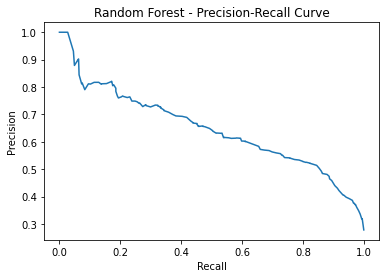

F1 Score : 0.568755846585594 
AUC Score (PR): 0.6476360176045914



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf,'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test,y_pred_rf, y_pred_rf_prob, 'Random Forest')

**Random Forest (optimistion)**

Pour le modèle Random Forest, RandomizedSearchCV est utilisé pour optimiser plusieurs hyperparamètres, y compris n_estimators, max_features, max_depth, critère et bootstrap

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#define parameter grid for randomsearch and instance and train model.
param_grid_rf ={
    'n_estimators' : np.arange(10,2000,10),
    'max_features' : ['auto','sqrt'],
    'max_depth': np.arange(10,200,10),
    'criterion': ['gini','entropy'],
    'bootstrap': [True , False] }

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf , param_distributions =param_grid_rf, cv= 5 , verbose = 0)
rf_random_grid.fit(X_train,y_train)

y_pred_rf_tuned= rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print("Random Forest  Best parameters : ", rf_random_grid.best_params_)

Random Forest  Best parameters :  {'n_estimators': 1930, 'max_features': 'auto', 'max_depth': 140, 'criterion': 'gini', 'bootstrap': True}


In [ ]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf,'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test,y_pred_rf, y_pred_rf_prob, 'Random Forest')

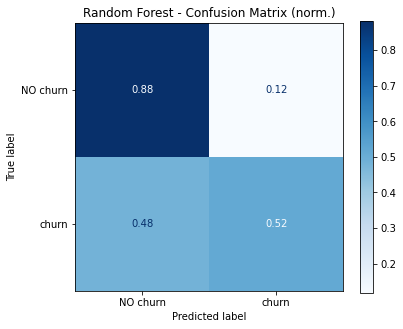

Accuracy Score Test y_test, y_pred: 0.780407004259347
Accuracy Score Train x_train, y_train: 0.9969574036511156 (comme comparison)



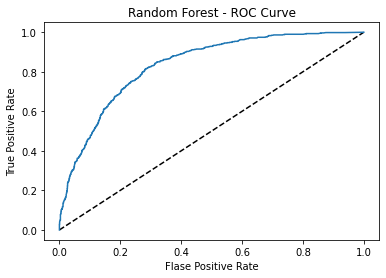

AUC Score (ROC): 0.8339762462361994



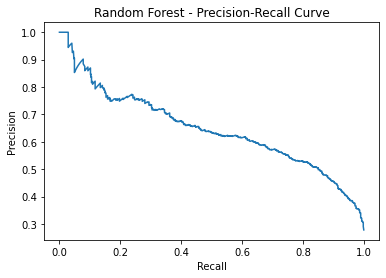

F1 Score : 0.5671641791044777 
AUC Score (PR): 0.6471703988284906



In [ ]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf_random_grid ,y_pred_rf_tuned,'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_tuned_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test,y_pred_rf_tuned, y_pred_rf_tuned_prob, 'Random Forest')


## <font color='blue'> k nearest neighbors *algorithm* : </font>

In [ ]:
#import bibliotheques
from sklearn.neighbors import KNeighborsClassifier
#3ayat algo
knn=KNeighborsClassifier(n_neighbors=1)
#application de l'algorithme sur la partie train du dataset
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

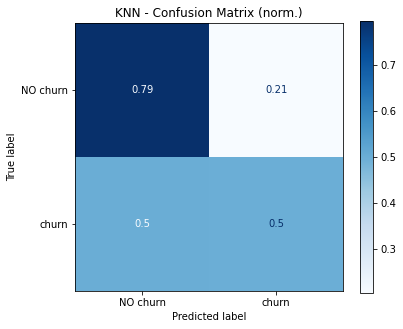

Accuracy Score Test y_test, y_pred: 0.7122574538570753
Accuracy Score Train x_train, y_train: 0.9967545638945233 (comme comparison)



In [ ]:
#on va calculer le score de notre algo 
#mais on doit evaluer le modele par la matrice de confusion
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)
#true positif = sabak el khir lka el khir  0,79
#true negatif = sabak el khayeb lka el khayeb 0.5
#false positif = sabak el behi lka el khayeb 0.5
#false negatif = sabak el khayeb yekhi lkaha behia 0.21

confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn,'KNN')

On remarque que le train score et le test score sont très proches l'un de l'autre. Mais quand meme on va essayer de régler les parametres du KNN pour améliorer les résultats.

In [ ]:
print(classification_report(y_test, y_pred_knn, digits=6))
#0 client mezel abonné , 1525 objets appartenants à la classe 0 
#1 client désabonné , 588 objets appartenants à la classe 1
# f1-score --> test score 

              precision    recall  f1-score   support

           0   0.804247  0.794754  0.799472      1525
           1   0.483498  0.498299  0.490787       588

    accuracy                       0.712257      2113
   macro avg   0.643873  0.646527  0.645130      2113
weighted avg   0.714990  0.712257  0.713572      2113



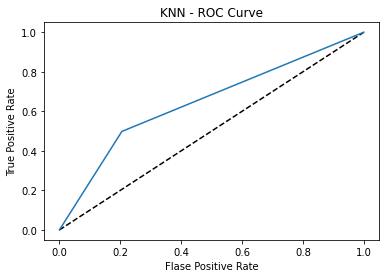

AUC Score (ROC): 0.6465267090442735



In [ ]:
#pour jujer notre algo on trace le courbe roc et la premiere bisectrice

roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')
#On remarque que notre courbe est au desssus de la 1er bissectrice donc on peut conserver notre algorithme et on va essayer de l'améliorer.

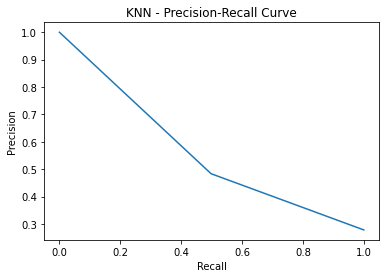

F1 Score : 0.490787269681742 
AUC Score (PR): 0.5607047978670976



In [ ]:
#presenter et calculer de l'aire de surface qui est au dessous de courbe ROC (c'est le AUC) et on garde l'algo qui a la plus grande valeur
precision_recall_curve_and_scores(X_test, y_test,y_pred_knn, y_pred_knn_prob, 'KNN')


## <font color='blue'> Amélioration de l'algorithme : KNN avec variation de n : </font>


In [ ]:
KNeighborsClassifier?

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_grid_param={'n_neighbors': np.arange(1,20), 'metric': ['euclidean', 'manhattan','minkowski']}
knn_grid=GridSearchCV(KNeighborsClassifier(), knn_grid_param, cv=5)
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
knn_grid.best_score_

0.7845841784989858

In [ ]:
knn_grid.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [ ]:
knn_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 12}

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=12 , metric='euclidean')
knn_2.fit(X_train,y_train) 

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

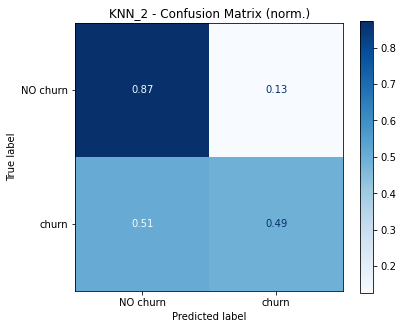

Accuracy Score Test y_test, y_pred: 0.767628963558921
Accuracy Score Train x_train, y_train: 0.8115618661257606 (comme comparison)



In [ ]:
#on va calculer le score de notre algo 
#mais on doit evaluer le modele par la matrice de confusion
y_pred_knn_2 = knn_2.predict(X_test)
y_pred_knn_2_prob = knn_2.predict_proba(X_test)
#true positif = sabak el khir lka el khir  0,79
#true negatif = sabak el khayeb lka el khayeb 0.5
#false positif = sabak el behi lka el khayeb 0.5
#false negatif = sabak el khayeb  yekhi lkaha behia 0.21

confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_2, y_pred_knn_2,'KNN_2')

In [ ]:
print(classification_report(y_test, y_pred_knn_2, digits=6))
#0 client mezel abonné , 1525 objets appartenants à la classe 0 
#1 client désabonné , 588 objets appartenants à la classe 1
# f1-score --> test score 

              precision    recall  f1-score   support

           0   0.817178  0.873443  0.844374      1525
           1   0.600414  0.493197  0.541550       588

    accuracy                       0.767629      2113
   macro avg   0.708796  0.683320  0.692962      2113
weighted avg   0.756857  0.767629  0.760105      2113



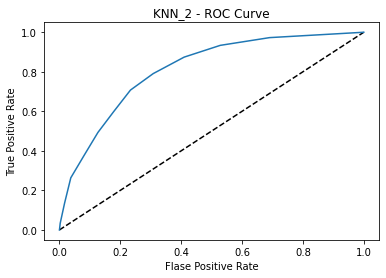

AUC Score (ROC): 0.8109551689528269



In [ ]:
#pour jujer notre algo on trace le courbe roc et la premiere bisectrice

roc_curve_auc_score(X_test, y_test, y_pred_knn_2_prob, 'KNN_2')
#On remarque que notre courbe est au desssus de la 1er bissectrice donc on peut conserver notre algorithme et on va essayer de l'améliorer.

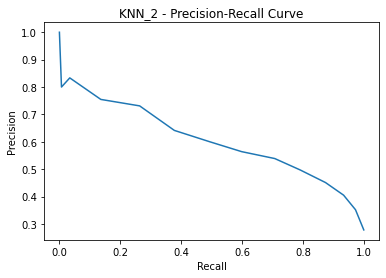

F1 Score : 0.5415499533146592 
AUC Score (PR): 0.6071482098128154



In [ ]:
#presenter et calculer de l'aire de surface qui est au dessous de courbe ROC (c'est le AUC) et on garde l'algo qui a la plus grande valeur
precision_recall_curve_and_scores(X_test, y_test,y_pred_knn_2, y_pred_knn_2_prob, 'KNN_2')


## <font color='blue'> KNN With hyperparameter (RandomizedSearchCV) : </font>


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
knn3 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
param_grid_knn_3 = {'n_neighbors': np.arange(1,20), 'metric': ['euclidean', 'manhattan','minkowski']}
search_knn = RandomizedSearchCV(knn3,param_distributions=param_grid_knn_3,
                           cv= 5,n_jobs=-1)
search_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
search_knn.best_score_

0.7813387423935092

In [ ]:
search_knn.best_estimator_

KNeighborsClassifier(n_neighbors=14)

In [ ]:
search_knn.best_params_

{'n_neighbors': 14, 'metric': 'minkowski'}

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=18 , metric='manhattan')
knn_3.fit(X_train,y_train) 

KNeighborsClassifier(metric='manhattan', n_neighbors=18)

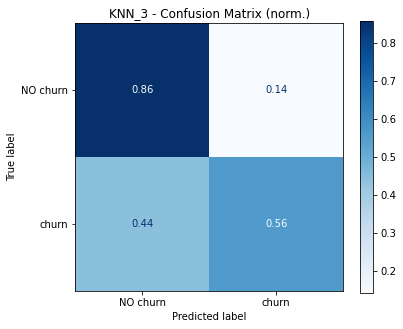

Accuracy Score Test y_test, y_pred: 0.7733080927591103
Accuracy Score Train x_train, y_train: 0.8091277890466532 (comme comparison)



In [ ]:
#on va calculer le score de notre algo 
#mais on doit evaluer le modele par la matrice de confusion
y_pred_knn_3 = knn_3.predict(X_test)
y_pred_knn_3_prob = knn_3.predict_proba(X_test)
#true positif = sabak el khir lka el khir  0,79
#true negatif = sabak el khayeb lka el khayeb 0.5
#false positif = sabak el behi lka el khayeb 0.5
#false negatif = sabak el khayeb yekhi lkaha behia 0.21

confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_3, y_pred_knn_3,'KNN_3')

In [ ]:
print(classification_report(y_test, y_pred_knn_3, digits=6))
#0 client mezel abonné , 1525 objets appartenants à la classe 0 
#1 client désabonné , 588 objets appartenants à la classe 1
# f1-score --> test score 

              precision    recall  f1-score   support

           0   0.833546  0.857049  0.845134      1525
           1   0.600000  0.556122  0.577229       588

    accuracy                       0.773308      2113
   macro avg   0.716773  0.706586  0.711181      2113
weighted avg   0.768555  0.773308  0.770582      2113



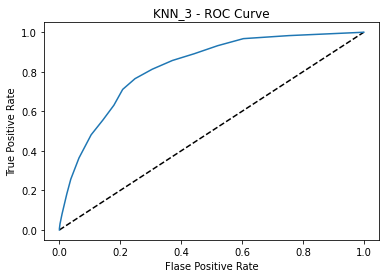

AUC Score (ROC): 0.8242238206758112



In [ ]:
#pour jujer notre algo on trace le courbe roc et la premiere bisectrice

roc_curve_auc_score(X_test, y_test, y_pred_knn_3_prob, 'KNN_3')
#On remarque que notre courbe est au desssus de la 1er bissectrice donc on peut conserver notre algorithme et on va essayer de l'améliorer.

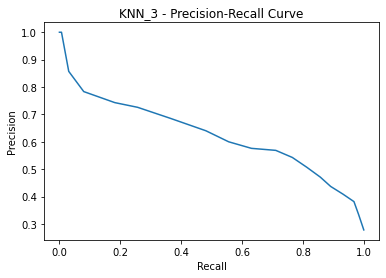

F1 Score : 0.5772285966460724 
AUC Score (PR): 0.6261774593474657



In [ ]:
#presenter et calculer de l'aire de surface qui est au dessous de courbe ROC (c'est le AUC) et on garde l'algo qui a la plus grande valeur
precision_recall_curve_and_scores(X_test, y_test,y_pred_knn_3, y_pred_knn_3_prob, 'KNN_3')



## <font color='blue'>SVM </font>


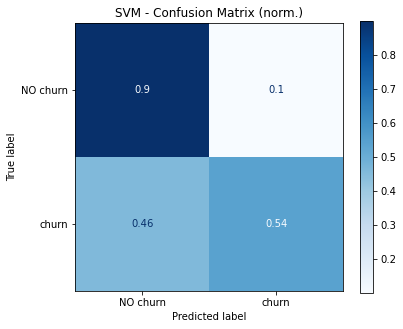

Accuracy Score Test y_test, y_pred: 0.7993374349266446
Accuracy Score Train x_train, y_train: 0.8198782961460446 (comme comparison)



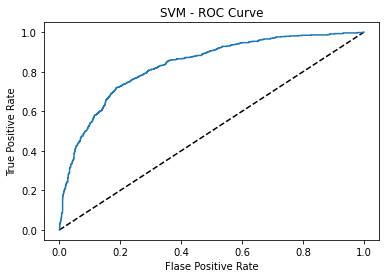

AUC Score (ROC): 0.8330322292851566



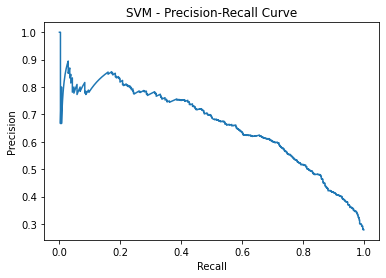

F1 Score : 0.6 
AUC Score (PR): 0.6597813399399245



In [ ]:
from sklearn.svm import  SVC

#instanciate and train the svm model on the training set.
support_vector_m = SVC(kernel='rbf', probability=True, random_state=0)
support_vector_m.fit(X_train, y_train)#X_train_sc"
#make predictions (classes and probabilities) withe the trained model on the test set
y_pred_svm = support_vector_m.predict(X_test)#X_test_sc
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

#plot model evaluations
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm,'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test,y_pred_svm, y_pred_svm_prob, 'SVM')


To address a potential bias stemming from the specific split of the data in the train-test-split part, cross-validation is used during hyperparameter tuning with Grid Search and Randomized Search. Cross validations splits the training data into in a specified amount of folds. For each iteration one fold is held out as “training-dev” set and the other folds are used as training set. Result of cross-validation is k values for all metrics on the k-fold CV.



## <font color='blue'>SVM OPTIMIZED </font>


For SVM GridSearchCV is used to determine the C value for the optimal margin around the support vector.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2 ,cv=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   3.9s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   3.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   3.6s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.5s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.2s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.2s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.2s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .

[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.5s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.5s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   3.8s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   3.5s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   3.8s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 69.7min finished


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.001, kernel='sigmoid')


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1525
           1       0.66      0.58      0.62       588

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



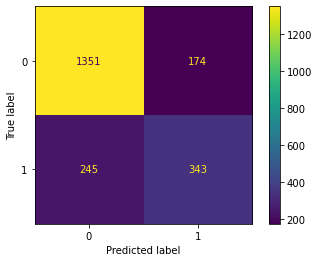

In [ ]:
from sklearn.metrics import plot_confusion_matrix
grid_predictions = grid.predict(X_test)
plot_confusion_matrix(grid, X_test, y_test)
print(classification_report(y_test,grid_predictions))


## <font color='blue'> Arbre De Decision ( CART ) :: </font>

On a divisé l'ensemble d'observations X et l'ensemble de classes Y en 2 sous-ensembles :

      *un sous-ensemble d'apprentissage : 80% de l'ensemble 
  
      *un sous-ensemble de test : 20% de l'ensemble initial 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

On a importé le modèle DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(random_state=0)

On a crée une instance dt de la classe 'DecisionTreeClassifier' en fixant à 0 le random_state .

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred_Cart = dt.predict(X_test)

In [ ]:
print('train score=', dt.score(X_train,y_train))
print('test score=', dt.score(X_test,y_test))

train score= 0.9969574036511156
test score= 0.7415996213913867


On a calculé le score d'apprentissage / test :

Le score de précision est très proche de 1.0 => sur-apprentissage ( overfitting

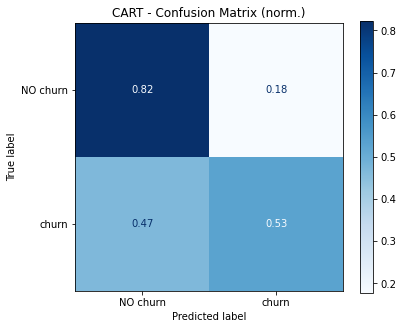

Accuracy Score Test y_test, y_pred: 0.7415996213913867
Accuracy Score Train x_train, y_train: 0.9969574036511156 (comme comparison)



In [ ]:
# on a évalué notre modèle en utilisant la matrice de confusion 


confusion_matrix_plot(X_train, y_train, X_test, y_test, dt, y_pred_Cart,'CART')


#plot_confusion_matrix(dt, X_test, y_test,display_labels=df["Churn Value"].unique(),cmap=plt.cm.Blues,normalize='true')  
#plt.show()

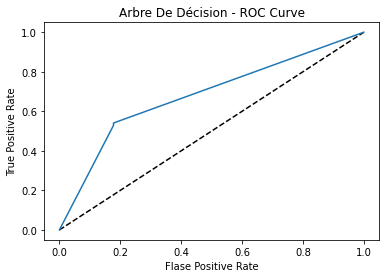

AUC Score (ROC): 0.68049793687967



In [ ]:
y_pred_Cart_prob = dt.predict_proba(X_test)
y_pred_Cart = dt.predict(X_test)
roc_curve_auc_score(X_test,y_test,y_pred_Cart_prob,"Arbre De Décision")

#On remarque que notre courbe est au desssus de la 1er bissectrice donc on peut conserver notre algorithme et on va essayer de l'améliorer

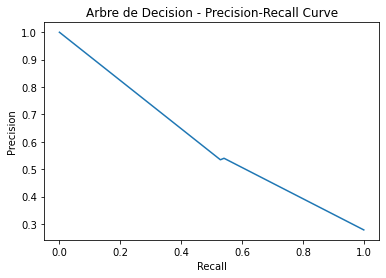

F1 Score : 0.5341296928327645 
AUC Score (PR): 0.6000124307892046



In [ ]:
#presenter et calculer de l'aire de surface qui est au dessous de courbe ROC (c'est le AUC) et on garde l'algo qui a la plus grande valeur
precision_recall_curve_and_scores(X_test,y_test,y_pred_Cart,y_pred_Cart_prob,"Arbre de Decision")

In [ ]:
from sklearn.metrics import classification_report
ypred=dt.predict(X_test)
print(classification_report(y_test,ypred,digits=8))

              precision    recall  f1-score   support

           0  0.82014388 0.82229508 0.82121807      1525
           1  0.53595890 0.53231293 0.53412969       588

    accuracy                      0.74159962      2113
   macro avg  0.67805139 0.67730400 0.67767388      2113
weighted avg  0.74106165 0.74159962 0.74132789      2113



In [ ]:
names=['Senior Citizen', 'Partner', 'Dependents', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Tenure Months', 'Monthly Charges',
       'services_supplementaires', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check']

In [ ]:
from sklearn.tree import export_text

print(export_text(dt,feature_names=names,show_weights=True ))

|--- Contract <= 0.50
|   |--- Online Security <= 0.50
|   |   |--- Tenure Months <= 0.10
|   |   |   |--- Internet Service <= 0.50
|   |   |   |   |--- Monthly Charges <= 0.37
|   |   |   |   |   |--- Tenure Months <= 0.03
|   |   |   |   |   |   |--- Paperless Billing <= 0.50
|   |   |   |   |   |   |   |--- Monthly Charges <= 0.06
|   |   |   |   |   |   |   |   |--- Payment Method_Electronic check <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Payment Method_Electronic check >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- Monthly Charges >  0.06
|   |   |   |   |   |   |   |   |--- Monthly Charges <= 0.07
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |   |   |   |--- Monthly Charges >  0.07
|   |   |   |   |   |   |   |   |   |--- Online Backup <= 1.00
|   |   |   |   |   |   |   |   |   |   |--- Monthly

Les règles sont très compliqués et difficiles à lire et interpréter . On va essayer de règler ce problème en règlant les hyperparamètres .




## <font color='blue'> Decision Tree Avec Hyperparamètres (GridSearchCV) : </font>

In [ ]:
param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(1,10)}

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
grid=GridSearchCV(DecisionTreeClassifier(random_state=1),param_grid,cv=3)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [ ]:
final_model=DecisionTreeClassifier(random_state=1,criterion='gini',max_depth=6)

In [ ]:
final_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [ ]:
y_pred_Cart2_prob = final_model.predict_proba(X_test)
y_pred_Cart2 = final_model.predict(X_test)

In [ ]:
print('train score=', final_model.score(X_train,y_train))
print('test score=', final_model.score(X_test,y_test))


train score= 0.8139959432048681
test score= 0.7908187411263606


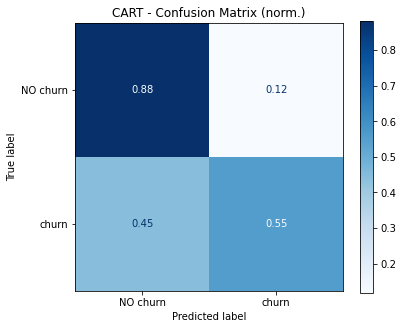

Accuracy Score Test y_test, y_pred: 0.7908187411263606
Accuracy Score Train x_train, y_train: 0.8139959432048681 (comme comparison)



In [ ]:
#plot_confusion_matrix(final_model, X_test, y_test,display_labels=df["Churn Value"].unique(),cmap=plt.cm.Blues,normalize='true')
#plt.show()

confusion_matrix_plot(X_train, y_train, X_test, y_test, final_model, y_pred_Cart2,'CART')


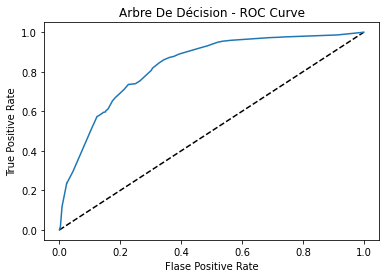

AUC Score (ROC): 0.8306239544998327



In [ ]:
roc_curve_auc_score(X_test,y_test,y_pred_Cart2_prob,"Arbre De Décision")


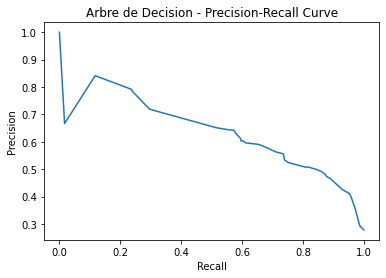

F1 Score : 0.5959780621572213 
AUC Score (PR): 0.6365301693675842



In [ ]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_Cart2,y_pred_Cart2_prob,"Arbre de Decision")

In [ ]:
ypred = final_model.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1525
           1       0.64      0.55      0.60       588

    accuracy                           0.79      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.78      0.79      0.79      2113



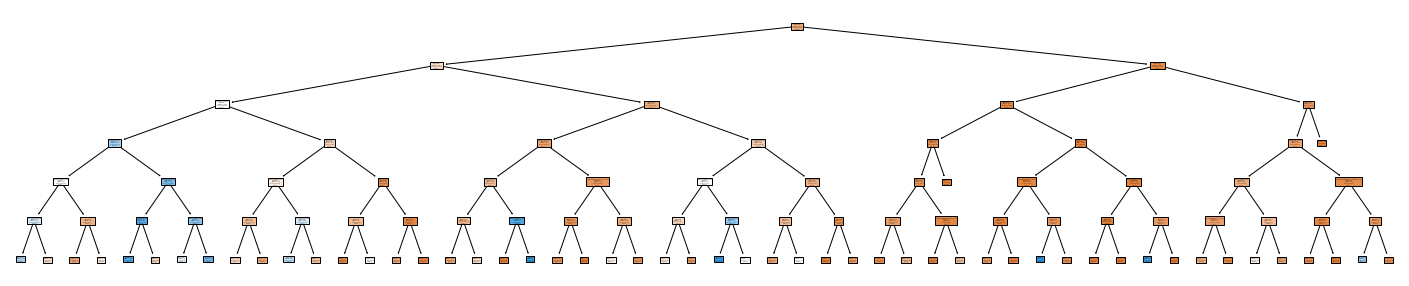

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree

Y=df["Churn Value"].unique()

Xnames = X1.columns

plt.figure(figsize=(25, 5))
plot_tree(final_model, feature_names=Xnames, class_names=str(Y), filled=True)
plt.show()

In [ ]:
names=['Senior Citizen', 'Partner', 'Dependents', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Tenure Months', 'Monthly Charges',
       'services_supplementaires', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check']

In [ ]:
from sklearn.tree import export_text

print(export_text(final_model,feature_names=names,show_weights=True ))

|--- Contract <= 0.50
|   |--- Online Security <= 0.50
|   |   |--- Tenure Months <= 0.10
|   |   |   |--- Internet Service <= 0.50
|   |   |   |   |--- Monthly Charges <= 0.37
|   |   |   |   |   |--- Tenure Months <= 0.03
|   |   |   |   |   |   |--- weights: [61.00, 98.00] class: 1
|   |   |   |   |   |--- Tenure Months >  0.03
|   |   |   |   |   |   |--- weights: [47.00, 35.00] class: 0
|   |   |   |   |--- Monthly Charges >  0.37
|   |   |   |   |   |--- Monthly Charges <= 0.47
|   |   |   |   |   |   |--- weights: [33.00, 10.00] class: 0
|   |   |   |   |   |--- Monthly Charges >  0.47
|   |   |   |   |   |   |--- weights: [7.00, 6.00] class: 0
|   |   |   |--- Internet Service >  0.50
|   |   |   |   |--- Tenure Months <= 0.02
|   |   |   |   |   |--- Tech Support <= 1.00
|   |   |   |   |   |   |--- weights: [19.00, 133.00] class: 1
|   |   |   |   |   |--- Tech Support >  1.00
|   |   |   |   |   |   |--- weights: [3.00, 2.00] class: 0
|   |   |   |   |--- Tenure Months >  0.